<br>

<font size=6>**[ANALYSIS & DATA SCIENCE] Flight Price Prediction**</font>

---
---

In [1]:
from platform import python_version
print('[VERSION] Python:', python_version())

[VERSION] Python: 3.10.12


In [ ]:
# %pip install --q watermark pandas numpy scikit-learn matplotlib seaborn -U

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings(action='ignore')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/fernandogalvao/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
# gravando as versões das bibliotecas utilizadas nesse notebook
%reload_ext watermark
%watermark -a 'Fernando Galvão | ANALYSIS & DATA SCIENCE] Flight Price Prediction' --iversions

Author: Fernando Galvão | ANALYSIS & DATA SCIENCE] Flight Price Prediction

seaborn   : 0.13.2
sklearn   : 1.5.0
pandas    : 2.2.2
plotly    : 5.22.0
numpy     : 1.26.4
matplotlib: 3.9.0



In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

plt.rcParams['figure.figsize'] = (8, 5)
plt.style.use(style='ggplot')

In [5]:
%pwd

'/home/fernandogalvao/Desktop/ANALYSIS-DATA-SCIENCE-Flight-Price-Prediction'

In [6]:
%ls

'[ANALYSIS_&_DATA_SCIENCE]_Flight_Price_Prediction.ipynb'   data/   README.md


In [7]:
%ls data/

business.csv  Clean_Dataset.csv  economy.csv


In [8]:
!head data/Clean_Dataset.csv

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954


In [9]:
df = pd.read_csv(filepath_or_buffer='data/Clean_Dataset.csv', sep=',')
print(f'{df.shape = }')

df.shape = (300153, 12)


In [10]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
df = pd.read_csv(filepath_or_buffer='data/Clean_Dataset.csv', 
                 sep=',', 
                 index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [12]:
df.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [15]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [16]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [17]:
categorical_columns = df.select_dtypes(exclude=int).columns
categorical_columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration'],
      dtype='object')

In [18]:
for col in categorical_columns:
    print('COLUMN | VALUE')
    print(f'{col} {df[col].value_counts()}\n\n')

COLUMN | VALUE
airline airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


COLUMN | VALUE
flight flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64


COLUMN | VALUE
source_city source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64


COLUMN | VALUE
departure_time departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64


COLUMN | VALUE
stops stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64


COLUMN | VALUE
arrival_time arrival_time
Night            915

In [19]:
categorical_columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration'],
      dtype='object')

In [20]:
cat_cols = categorical_columns.delete(loc=1)
cat_cols

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration'],
      dtype='object')

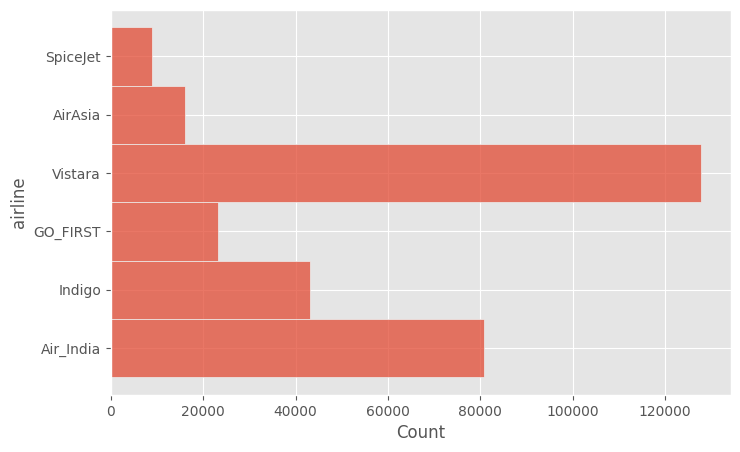

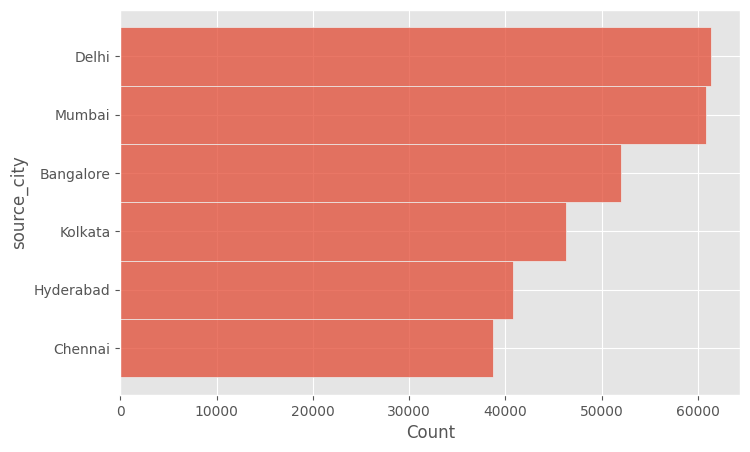

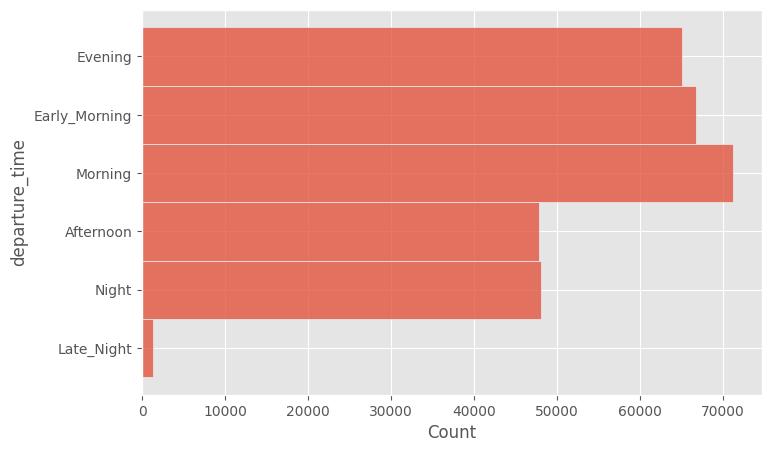

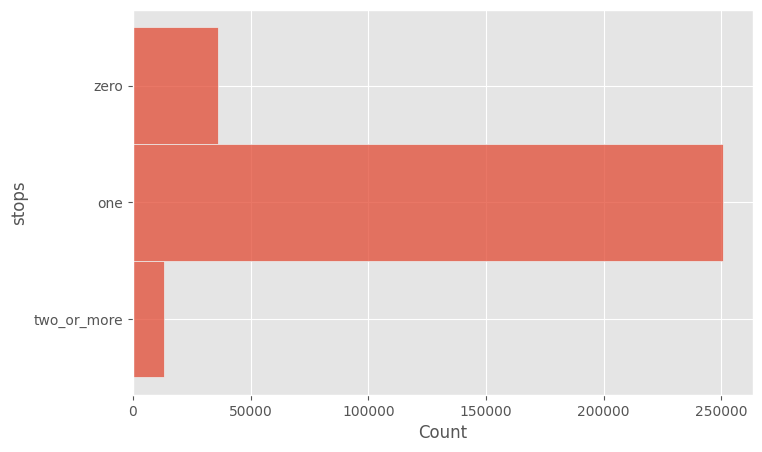

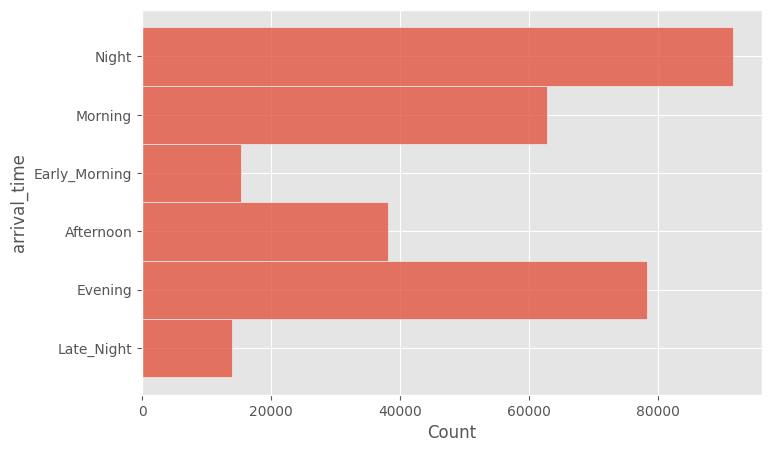

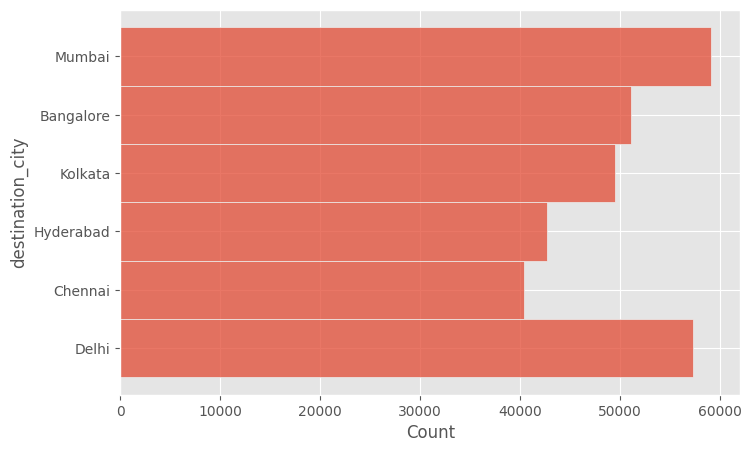

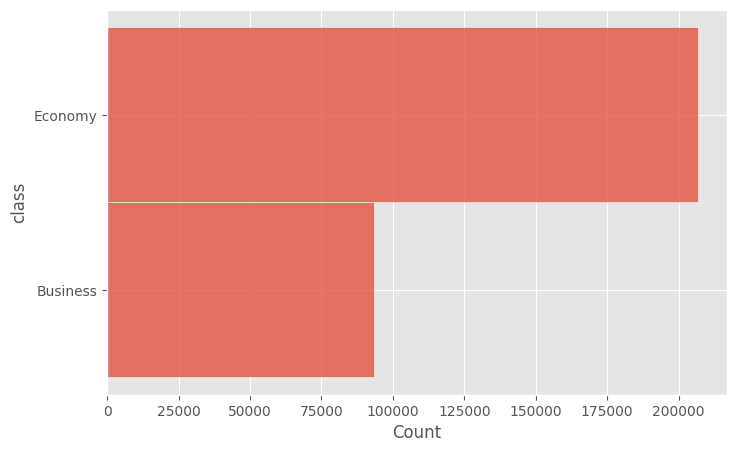

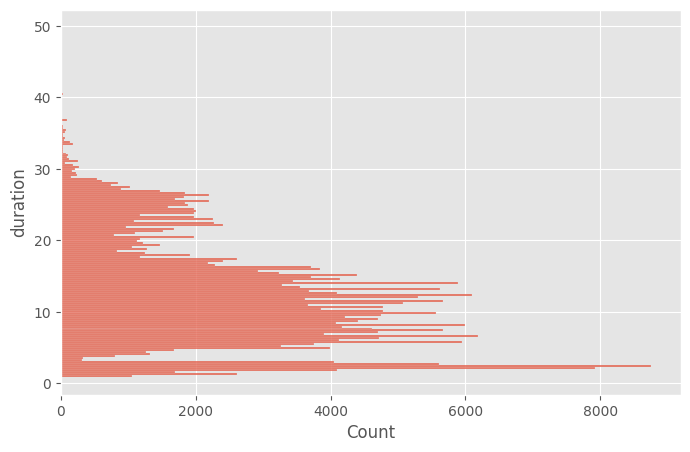

In [21]:
for col in cat_cols:
    sns.histplot(data=df, y=col)
    plt.show()

In [22]:
for col in df.columns:
    display(df[[col]].describe(include='all').T)

,count,unique,top,freq
airline,300153,6,Vistara,127859


,count,unique,top,freq
flight,300153,1561,UK-706,3235


,count,unique,top,freq
source_city,300153,6,Delhi,61343


,count,unique,top,freq
departure_time,300153,6,Morning,71146


,count,unique,top,freq
stops,300153,3,one,250863


,count,unique,top,freq
arrival_time,300153,6,Night,91538


,count,unique,top,freq
destination_city,300153,6,Mumbai,59097


,count,unique,top,freq
class,300153,2,Economy,206666


,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83


,count,mean,std,min,25%,50%,75%,max
days_left,300153.0,26.004751,13.561004,1.0,15.0,26.0,38.0,49.0


,count,mean,std,min,25%,50%,75%,max
price,300153.0,20889.660523,22697.767366,1105.0,4783.0,7425.0,42521.0,123071.0


In [44]:
df2 = df.copy()
df2.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [45]:
df2.drop(labels='flight', axis=1, inplace=True)
df2.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [46]:
df2['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [47]:
df2['class'].value_counts(normalize=True) * 100

class
Economy     68.853551
Business    31.146449
Name: proportion, dtype: float64

In [48]:
df2['class'] = df2['class'].apply(func=lambda x: 1 if x == 'Business' else 0)

In [49]:
df2['class'].value_counts()

class
0    206666
1     93487
Name: count, dtype: int64

In [50]:
df2['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [51]:
pd.factorize(values=df2['stops'])

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['zero', 'one', 'two_or_more'], dtype='object'))

In [52]:
df2['stops'] = pd.factorize(values=df2['stops'])[0]

In [53]:
df2['stops'].value_counts()

stops
1    250863
0     36004
2     13286
Name: count, dtype: int64

In [54]:
df2.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [55]:
df2.dtypes

airline              object
source_city          object
departure_time       object
stops                 int64
arrival_time         object
destination_city     object
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

In [56]:
pd.get_dummies(data=df2['airline'], 
               prefix='airlane',
               dtype=int).head()

,airlane_AirAsia,airlane_Air_India,airlane_GO_FIRST,airlane_Indigo,airlane_SpiceJet,airlane_Vistara
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [57]:
df2.join(other=pd.get_dummies(data=df2['airline'], 
                              prefix='airline', 
                              dtype=int)).drop(labels='airline', axis=1).head()

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,0,0,0,0,1,0
1,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,0,0,0,0,1,0
2,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,1,0,0,0,0,0
3,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,0,0,0,0,0,1
4,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,0,0,0,0,0,1


In [58]:
cat_cols = df2.select_dtypes(exclude=[int, float]).columns
cat_cols

Index(['airline', 'source_city', 'departure_time', 'arrival_time',
       'destination_city'],
      dtype='object')

In [59]:
df2.join(other=pd.get_dummies(data=df2[cat_cols], 
                              prefix=cat_cols, 
                              dtype=int)).drop(labels=cat_cols, axis=1).head()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [60]:
df2 = df2.join(other=pd.get_dummies(data=df2[cat_cols], 
                                    prefix=cat_cols, 
                                    dtype=int)).drop(labels=cat_cols, axis=1)

In [61]:
df2.shape

(300153, 35)

In [62]:
df2.head()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [63]:
df2.columns

Index(['stops', 'class', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Bangalore',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Bangalore', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai'],
      dtype='object')

In [65]:
X, y = df2.drop(labels='price', axis=1), df2['price']

In [66]:
X.shape, y.shape

((300153, 34), (300153,))

In [67]:
X.head()

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,2.17,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
